# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("M:\Mis 808\MIS 637\Machine Learning Project\Stroke.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Handling missing values

In [4]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df['bmi'].fillna(df.bmi.median(),inplace=True)

In [6]:
df.drop(['id'],axis=1,inplace=True)
    

# Exploratory Data Analysis

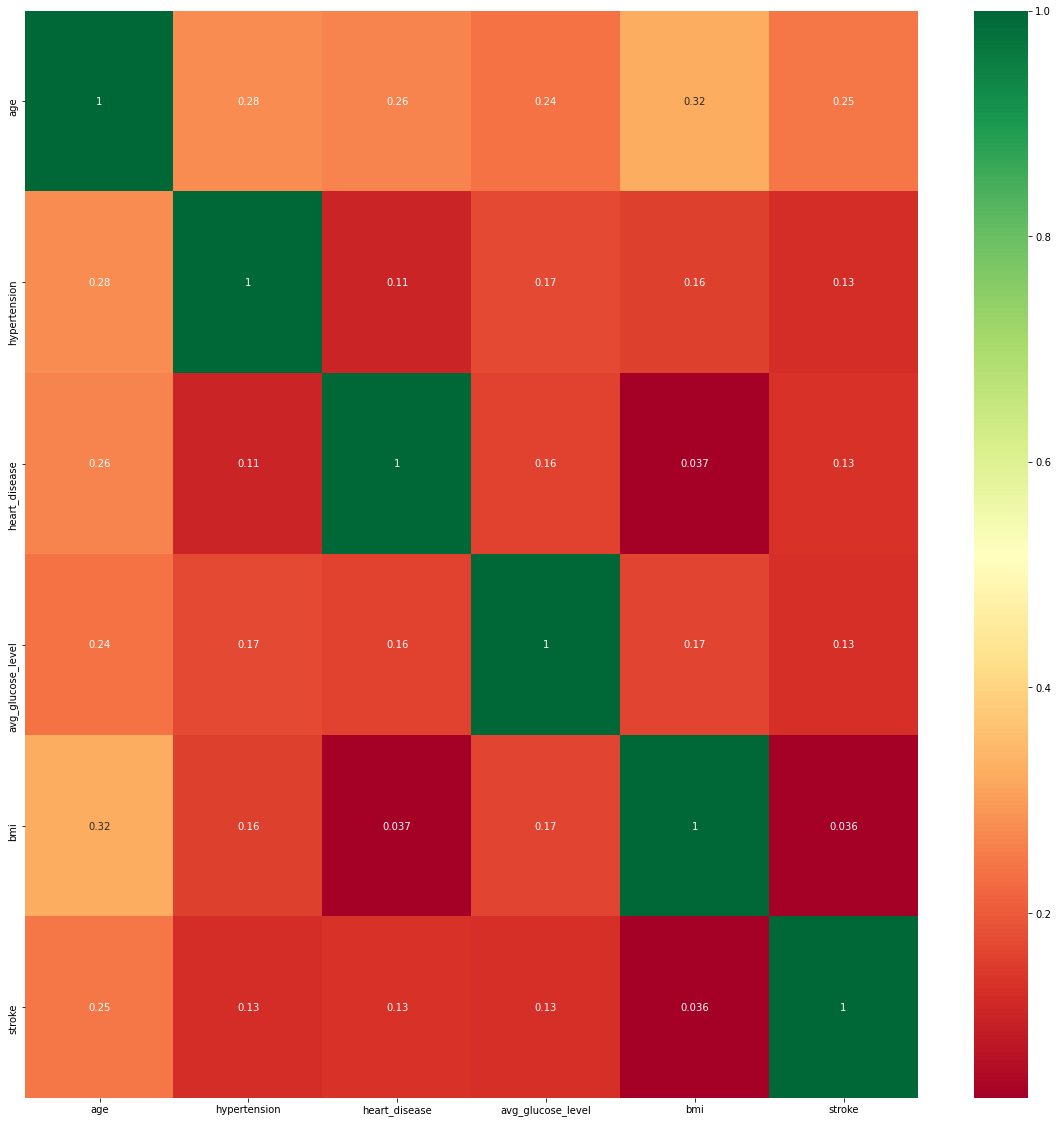

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap ="RdYlGn")
plt.show()

In [8]:
# Categorical Features
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
for feature in cat_feature:
    d=df.copy()
    print("The Categorical Features are {}".format(feature))

The Categorical Features are gender
The Categorical Features are ever_married
The Categorical Features are work_type
The Categorical Features are Residence_type
The Categorical Features are smoking_status


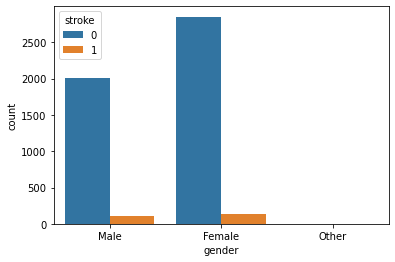

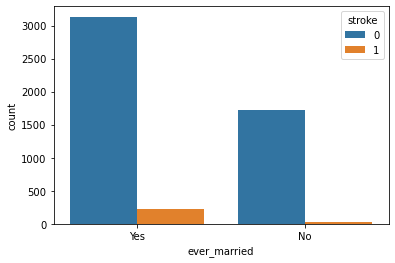

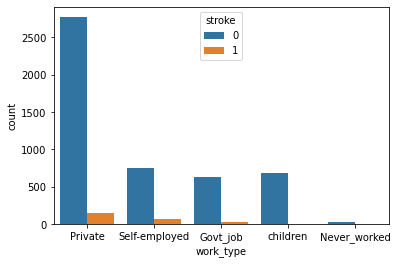

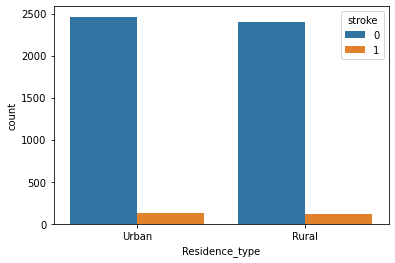

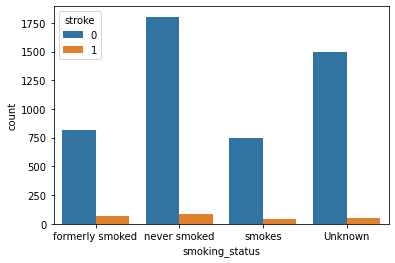

In [9]:
# Plotting Categorical Features
for feature in cat_feature:
    d=df.copy()
    sns.countplot(x=feature,hue='stroke',data=d)
    plt.show()

In [10]:
# Numerical Features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O'and feature!='id']
for feature in numerical_features:
    print("The numerical features are {}".format(feature))

The numerical features are age
The numerical features are hypertension
The numerical features are heart_disease
The numerical features are avg_glucose_level
The numerical features are bmi
The numerical features are stroke


In [11]:
# Discrete Features
dis=[feature for feature in numerical_features if len((df[feature]).unique())<25 and feature!='stroke']
for feature in dis:
    print("The discrete features are {}".format(feature))
    

The discrete features are hypertension
The discrete features are heart_disease


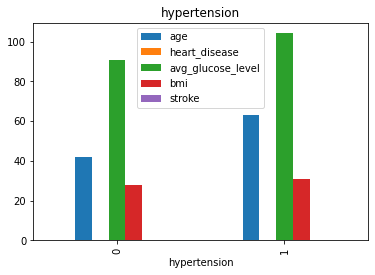

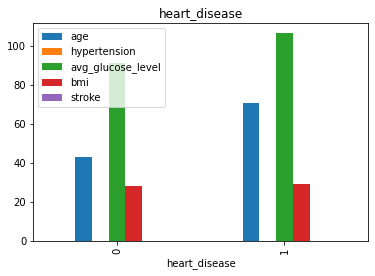

In [12]:
# plotting Discrete Features
for feature in dis:
    d=df.copy()
    d.groupby(feature).median().plot(kind='bar')
    plt.title(feature)
    plt.show()

In [13]:
# Continuous Features
cont=[feature for feature in numerical_features if feature not in dis and feature!='stroke']
for feature in cont:
    print("The continuous features are {}".format(feature))

The continuous features are age
The continuous features are avg_glucose_level
The continuous features are bmi


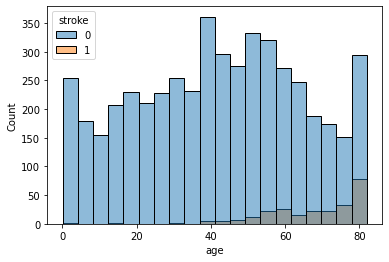

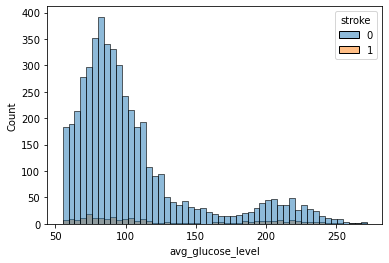

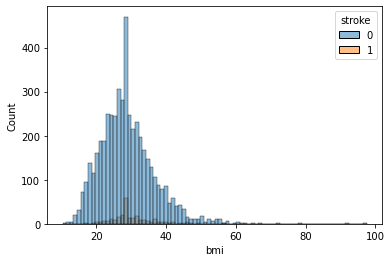

In [14]:
# Plotting Continuous Features:
for feature in cont:
    d=df.copy()
    sns.histplot(x=feature,hue='stroke',data=d)
    plt.show()

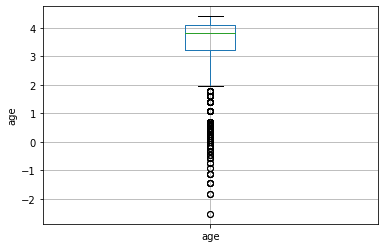

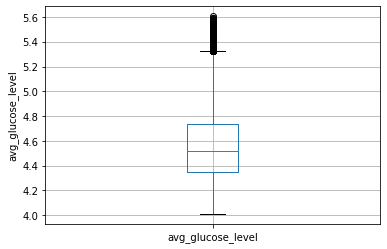

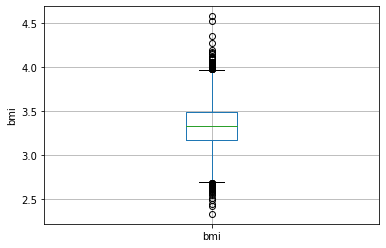

In [15]:
# Applying Log transformation
for feature in cont:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()

<AxesSubplot:xlabel='age'>

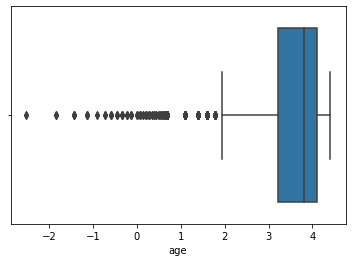

In [16]:
import seaborn as sns
sns.boxplot('age',data=df)

<AxesSubplot:xlabel='avg_glucose_level'>

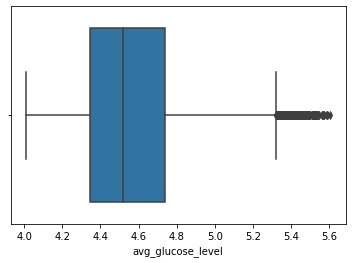

In [17]:
sns.boxplot('avg_glucose_level',data=df)

<AxesSubplot:xlabel='bmi'>

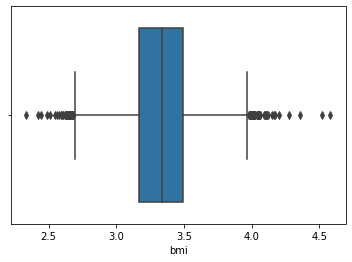

In [18]:
import seaborn as sns
sns.boxplot('bmi',data=df)

In [19]:
df.drop(['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis=1,inplace=True)

In [20]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,4.204693,0,1,5.432367,3.600048,1
1,4.110874,0,0,5.309307,3.335770,1
2,4.382027,0,1,4.662684,3.481240,1
3,3.891820,0,0,5.143008,3.538057,1
4,4.369448,1,0,5.159745,3.178054,1
...,...,...,...,...,...,...
5105,4.382027,1,0,4.427836,3.335770,0
5106,4.394449,0,0,4.829912,3.688879,0
5107,3.555348,0,0,4.418720,3.421000,0
5108,3.931826,0,0,5.113733,3.242592,0


In [21]:
Y = df['stroke']
X = df.drop(['stroke'], axis = 1)

[0.2892423  0.01630204 0.01712948 0.35958198 0.3177442 ]


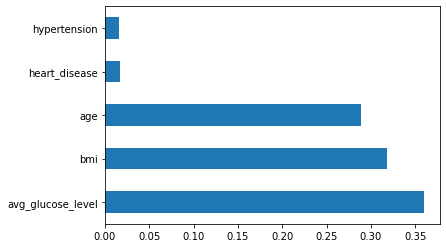

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [23]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,4.204693,0,1,5.432367,3.600048
1,4.110874,0,0,5.309307,3.335770
2,4.382027,0,1,4.662684,3.481240
3,3.891820,0,0,5.143008,3.538057
4,4.369448,1,0,5.159745,3.178054


In [24]:
# Treating Imbalanced Dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_oversample, y_oversample = smote.fit_resample(X, Y)

print(Y.value_counts())
print(y_oversample.value_counts())

0    4861
1     249
Name: stroke, dtype: int64
1    4861
0    4861
Name: stroke, dtype: int64


In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_oversample, y_oversample,test_size=0.3,random_state=0)

In [26]:
# Features to be Scaled
scaling_feature=[feature for feature in df.columns if feature!='stroke']
scaling_feature

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_norm = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X_train[cols_to_norm] = StandardScaler().fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = StandardScaler().fit_transform(X_test[cols_to_norm])

In [28]:
X_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
2913,-0.044802,2.119766,-0.376408,-0.049829,1.135968
8359,0.608306,2.119766,2.656692,1.563898,0.128128
7966,0.558515,2.119766,-0.376408,1.117767,1.027669
6381,0.167540,2.119766,-0.376408,-0.984446,0.362801
5112,0.442599,-0.471750,-0.376408,-0.090321,-0.458802


In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
L=LogisticRegression(random_state=0)
L.fit(X_train,Y_train)
y_pred_L=L.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
print(accuracy_score(Y_test,y_pred_L)*100)

77.13404182379156


In [33]:
print('Precision Score: ', round(precision_score(Y_test, y_pred_L), 2))
print('Recall Score: ', round(recall_score(Y_test,y_pred_L), 2))
print('F1 Score: ', round(f1_score(Y_test, y_pred_L), 2))
print('Accuracy Score: ', round(accuracy_score(Y_test, y_pred_L), 2))
print('ROC AUC: ', round(roc_auc_score(Y_test, y_pred_L), 2))


Precision Score:  0.74
Recall Score:  0.84
F1 Score:  0.79
Accuracy Score:  0.77
ROC AUC:  0.77


In [34]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
g_pred=gb.predict(X_test)

In [35]:
print(accuracy_score(Y_test,g_pred)*100)

78.88241343846417


In [36]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
print('Precision Score: ', round(precision_score(Y_test, g_pred), 2))
print('Recall Score: ', round(recall_score(Y_test,g_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, g_pred), 2))
print('Accuracy Score: ', round(accuracy_score(Y_test, g_pred), 2))
print('ROC AUC: ', round(roc_auc_score(Y_test,g_pred), 2))

Precision Score:  0.76
Recall Score:  0.84
F1 Score:  0.8
Accuracy Score:  0.79
ROC AUC:  0.79


In [37]:
# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(criterion='entropy', random_state=0)
d.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
d_pred=d.predict(X_test)

In [39]:
print(accuracy_score(Y_test,d_pred)*100)

81.38498457319163


In [40]:
param_dist={
    
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
}

In [41]:
# Using GridSearch CV for HyperParameter tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(d,param_grid=param_dist,cv=10,n_jobs=-1)


In [42]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [43]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
print("The Best Accuracy score {}".format(grid.best_score_*100))

The Best Accuracy score 90.13917681610091
